In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# [Morphological Transformations](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html)

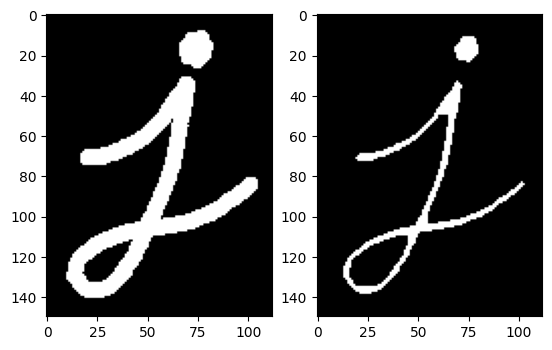

In [3]:
img = cv.imread('../img/j-image.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(erosion, cmap="gray")
plt.show()

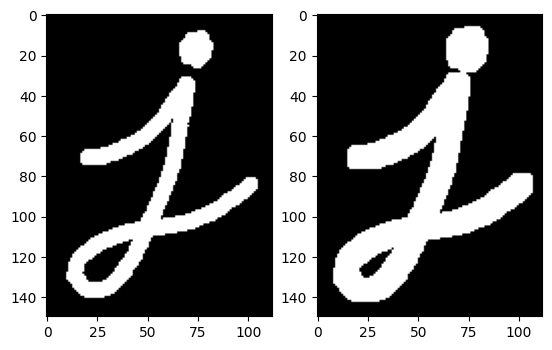

In [4]:
dilation = cv.dilate(img,kernel,iterations = 1)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(dilation, cmap="gray")
plt.show()

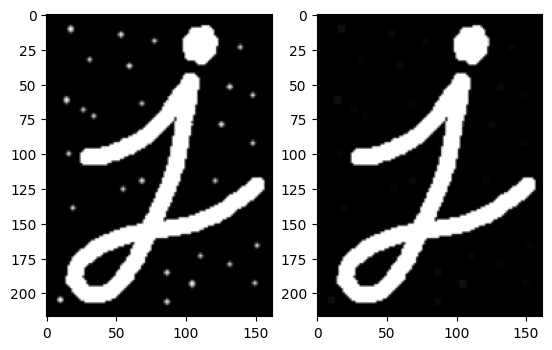

In [5]:
img = cv.imread('../img/opening.png', cv.IMREAD_GRAYSCALE)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(opening, cmap="gray")
plt.show()

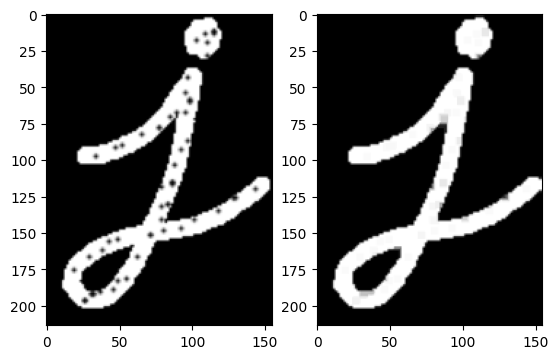

In [6]:
img = cv.imread('../img/closing.png', cv.IMREAD_GRAYSCALE)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(closing, cmap="gray")
plt.show()

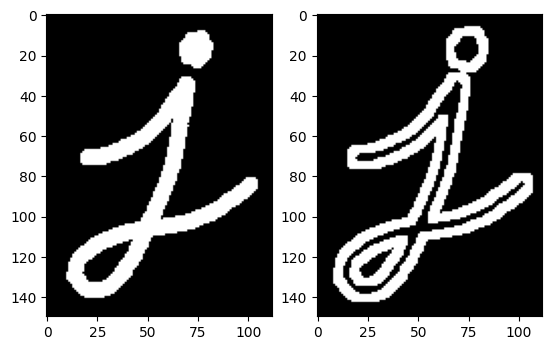

In [7]:
img = cv.imread('../img/j-image.png', cv.IMREAD_GRAYSCALE)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(gradient, cmap="gray")
plt.show()

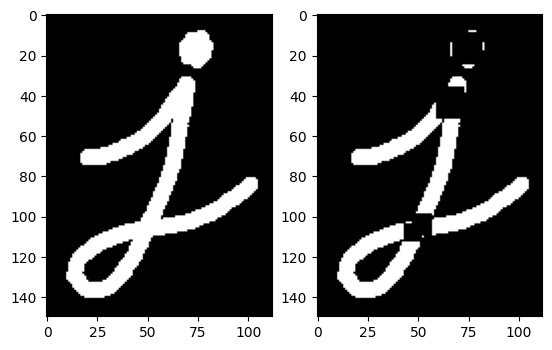

In [8]:
kernel = np.ones((9,9),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(tophat, cmap="gray")
plt.show()

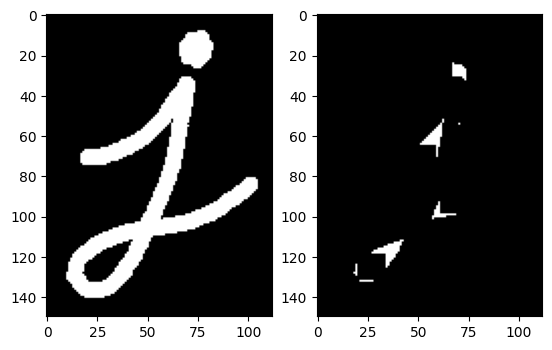

In [9]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(blackhat, cmap="gray")
plt.show()

In [10]:
cv.getStructuringElement(cv.MORPH_RECT,(5,5)), cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)), cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

(array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=uint8),
 array([[0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0]], dtype=uint8),
 array([[0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]], dtype=uint8))

# [Extract horizontal and vertical lines by using morphological operations](https://docs.opencv.org/4.x/dd/dd7/tutorial_morph_lines_detection.html)

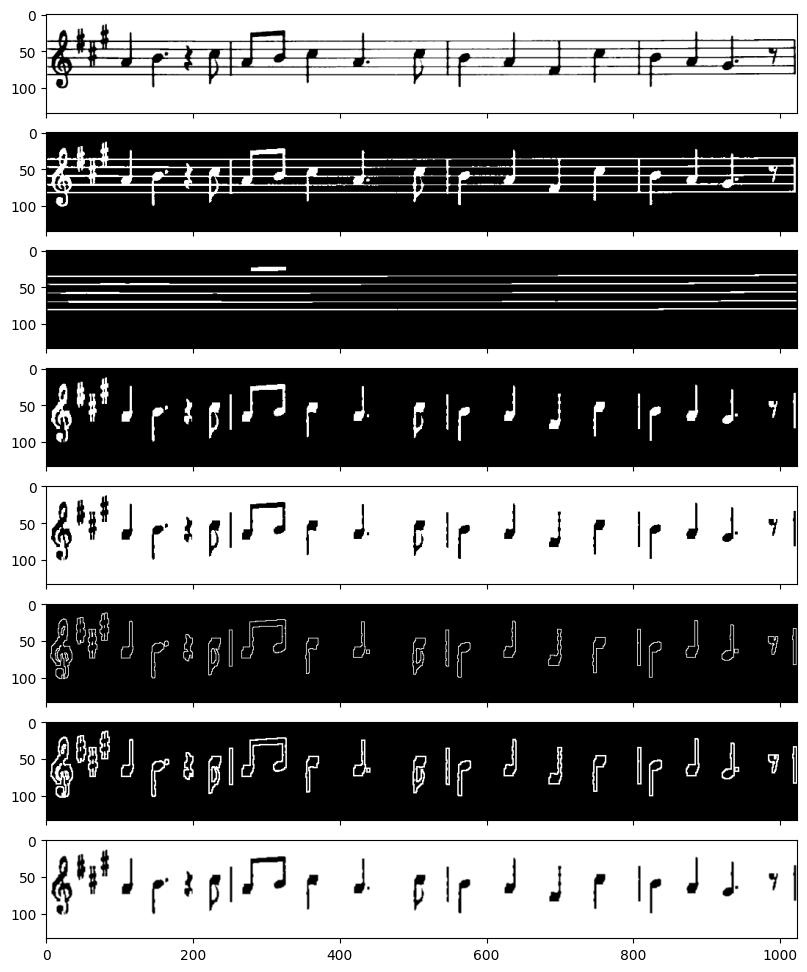

In [18]:
fig, ax = plt.subplots(8, 1, figsize=(20,12), sharex=True) 
 
src_path = "../img/morph.png"

# [load_image]
# Check number of arguments

# Load the image
src = cv.imread(src_path, cv.IMREAD_COLOR)

# Check if image is loaded fine
if src is None:
    print ('Error opening image: ')
    exit()

# Show source image

# [load_image]

# [gray]
# Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src

# Show gray image
ax[0].imshow(gray, cmap="gray")
# [gray]

# [bin]
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 15, -2)
# Show binary image
ax[1].imshow(bw, cmap="gray")
# [bin]

# [init]
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)
vertical = np.copy(bw)
# [init]

# [horiz]
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))

# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

# Show extracted horizontal lines
ax[2].imshow(horizontal, cmap="gray")
# [horiz]

# [vert]
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

# Show extracted vertical lines
ax[3].imshow(vertical, cmap="gray")
# [vert]

# [smooth]
# Inverse vertical image
vertical = cv.bitwise_not(vertical)
ax[4].imshow(vertical, cmap="gray")

'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''

# Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 3, -2)
ax[5].imshow(edges, cmap="gray")

# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
ax[6].imshow(edges, cmap="gray")

# Step 3
smooth = np.copy(vertical)

# Step 4
smooth = cv.blur(smooth, (2, 2))

# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]

# Show final result
ax[7].imshow(vertical, cmap="gray")
# [smooth]
 
plt.show()

# [Text Line Detection and Recognition using OpenCV: A Comprehensive Guide](https://ajlearn.net/opencv_textline_extraction_recognition)

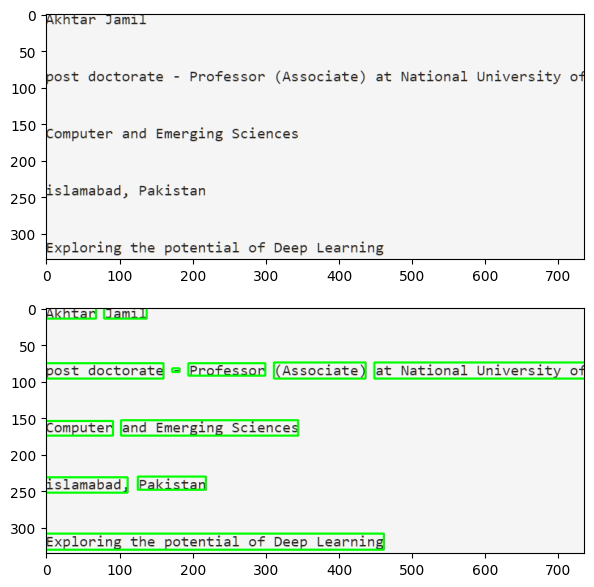

In [29]:
# Step 1: Load the image
image_path = '../img/text.png'
image = cv.imread(image_path)

# Check if the image is None
if image is None:
    raise ValueError("Invalid image file or path.")
    
fig, ax = plt.subplots(2, 1, figsize=(15, 7))
ax[0].imshow(image)

# Step 2: Preprocess the image
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (3, 3), 0)
bw = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

# selected a kernel with more width so that we want to connect lines
kernel_size = (15, 1) 
kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)

# Step 3: Perform the closing operation: Dilate and then close
bw_closed = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

# Find contours for each text line
contours, _ = cv.findContours(bw_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter contours to select those whose width is at least 3 times its height
filtered_contours = [cnt for cnt in contours if (cv.boundingRect(cnt)[2] / cv.boundingRect(cnt)[3])>=3.0]

# Sort contours based on y-coordinate
sorted_contours = sorted(filtered_contours, key=lambda contour: cv.boundingRect(contour)[1])

padding=3
for contour in sorted_contours:
    x, y, w, h = cv.boundingRect(contour)
    x, y, w, h = (x-padding, y-padding, w+padding, h+padding) 
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Recognize each line. Crop the image for each line and pass to OCR engine.
    line_image = image[y:y + h, x:x+w]

ax[1].imshow(image)
plt.show()